In [65]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swiif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 1. EDA
* Prepare DF
* Preview the data 
* Check for missing fields
* Check for duplicates

In [3]:
df = pd.read_csv('../data/clickbait_title_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [4]:
df.head()

,title,clickbait
0,""".asia"" domain applications near 300,000 on op...",0
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1
2,"""7th Heaven"" television series comes to an end",0
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1
4,"""Beans Memes"" Is The Only Twitter Account That...",1


In [5]:
if df.isnull().values.any():
    print(f"There are {df.isna().sum()} missing values in the dataset.")
    msno.matrix(df)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [6]:
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset.")#
    df = df.drop_duplicates()
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


<Figure size 800x500 with 0 Axes>

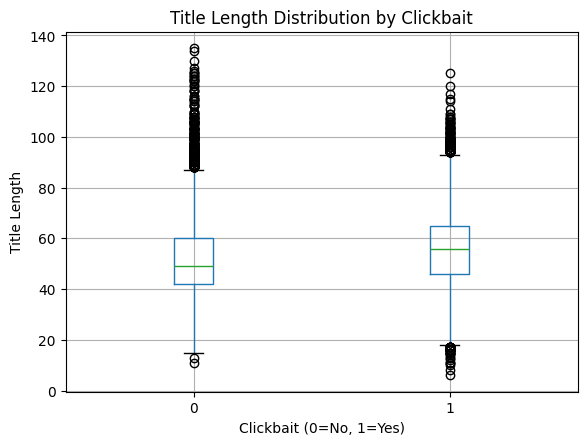

In [ ]:
if 'title_length' not in df.columns:
	df['title_length'] = df['title'].str.len()

plt.figure(figsize=(8, 5))
df.boxplot(column='title_length', by='clickbait')
plt.xlabel('Clickbait (0=No, 1=Yes)')
plt.ylabel('Title Length')
plt.title('Title Length Distribution by Clickbait')
plt.suptitle('')
plt.show()

Interesting there are some really short titles.

In [ ]:
df[df['title_length'] < 17]

,title,clickbait,title_length
5778,33 Bad Puns,1,11
6507,9 Period Hacks,1,14
6539,9 Times I Cried,1,15
7873,Are Emojis Words,1,16
7931,Are You Dead,1,12
8788,BFWKND,1,6
9780,COCK BLOCK,1,10
11510,DIY Sugar Wax,1,13
11985,Do You Have ESP,1,15
14408,Goys Try Latkes,1,15


In [ ]:
df[df['title_length'] > 120]

,title,clickbait,title_length
8673,Australian rules football: West Gippsland Latr...,0,126
9866,"Cambridge, Mass., city council recommends cons...",0,127
10617,Catholic Democrats tell Chicago Cardinal Georg...,0,125
10664,"Champaign, Illinois mayor doubts Obama's natur...",0,123
11156,Common Sense Advisory announces size of worldw...,0,135
12574,England; Australia set to battle for right to ...,0,124
18301,Liberal Democrats defeated in UK elections aft...,0,130
20763,Opposition motions in Australian House of Repr...,0,125
20969,Palestinian security forces clash with militan...,0,122
24516,Teen charged with seven felonies related to th...,0,125


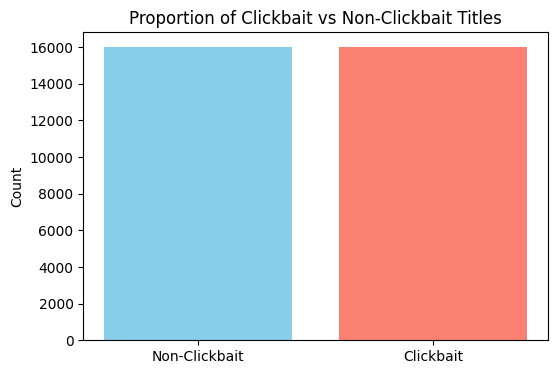

In [28]:
clickbait_counts = df['clickbait'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['Non-Clickbait', 'Clickbait'], clickbait_counts, color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Proportion of Clickbait vs Non-Clickbait Titles')
plt.show()

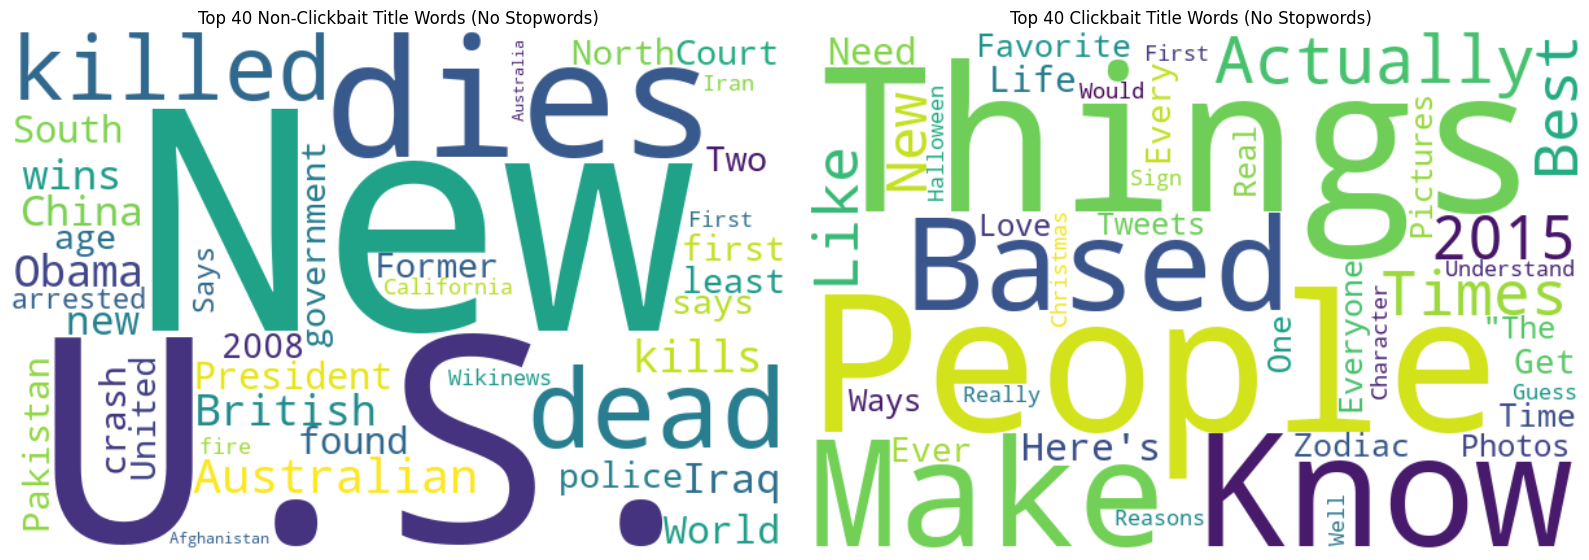

In [80]:
top_n = 40  # Change this value for more or fewer words

stop_words = set(stopwords.words('english'))

non_clickbait_titles = ' '.join(df[df['clickbait'] == 0]['title'])
words_non = [word for word in non_clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_non = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_non))

clickbait_titles = ' '.join(df[df['clickbait'] == 1]['title'])
words_click = [word for word in clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_click = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_click))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(wordcloud_non, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title(f'Top {top_n} Non-Clickbait Title Words (No Stopwords)')
axes[1].imshow(wordcloud_click, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title(f'Top {top_n} Clickbait Title Words (No Stopwords)')
plt.tight_layout()
plt.show()